# Decodifica di Hamming

Nelle telecomunicazioni i canali su cui viaggia l'informazione non sempre sono ideali. La richiesta che un canale sia privo di rumore, ovvero che un messaggio ricevuto non abbia subito delle modifiche durante il suo viaggio e che sia rimasto uguale quello inviato, è una richiesta molto forte.

Come possiamo modellizzare la presenza di rumore? Due comunicatori, che chiamiamo Alice e Bob, si scambiano una sequenza di bit su un canale. ${a_1, a_2, a_3, \cdots}$ sono i bit inviati da Alice, ${b_1, b_2, b_3, \cdots}$ sono i bit letti da Bob, dove $a_i,b_i \in \left\{0, 1\right\}$. Nel canale i bit non vengono dispersi (se entrano $N$ bit, escono $N$ bit) e il rumore è descritto da una probabilità non nulla $p_e$ che avvenga un *bit-flip* su un simbolo $a_i$ inviato da Alice

$$ p_e = P(a_i = 0 | b_i = 1) =  P(a_i = 1 | b_i = 0) \textrm{.}$$

Questa probabilità non dipende dal tempo o dal messaggio ma solo dal canale, che per essere "decente" deve avere $p_e \ll \frac{1}{2}$.

### Ridondanza

A livello logico l'informazione è data da una sequenza di bit e gli errori consistono in delle modifiche casuali nella sequenza. L'idea è quindi di inviare dell'informazione in eccesso rispetto a quella da trasmettere e sfruttare questa ridondanza per individuare e correggere gli errori. Un protocollo di questo tipo potrebbe consistere nell'inviare $2k+1$ volte lo stesso bit e in fase di decodifica correggere l'errore usando il bit in maggioranza, ma sarebbe molto costoso in termini di *overhead* (bit aggiuntive a quelli informativi).

### Parità

Dato un messaggio di $N$ bit $b_1, \cdots, b_N$, un *<u>parity-check</u>* consiste nell'aggiunge un bit $c_p$ che consente di rilevare la presenza di un qualsiasi numero <u>dispari</u> di errori.

$$ \left( c_p + \sum_{i=1}^{N} b_i \right) \; \% \; 2 = 0 $$

Seppur abbia un costo minimo in termini di memoria, il parity check consente di rilevare solamente la presenza di un numero dispari e non permette di correggerli.

## Codici di Hamming

I codici di Hamming sono una famiglia di codici a blocchi lineari che sfruttano la ridondanza e il controllo di parità per la correzione automatica degli errori.

> **Codice lineare**: codice di correzione degli errori per cui ogni combinazione lineare di parole di codice (*code-words*) è ancora una parola di codice.

Una parola di codice è un elemento standardizzato di un protocollo, che deve rispettare specifiche regole del codice e a cui è assegnato un valore univoco. Siccome i codici di Hamming sono codici binari, combinazioni lineari di parole di codice sono date da somme bit a bit modulo $2$.

> **Codice a blocchi**: codice di correzione degli errori che codifica (organizza) i dati in blocchi.

I codici di Hamming sono famiglie di codici binari $(n, k)$ dove per ogni intero $r \ge 2$ c'è una code-word (un blocco) di lunghezza $n = 2^r - 1$ che contiene un messaggio di lunghezza $k = 2^r - r - 1$. Il blocco su cui opera Hamming è dunque dato da un messaggio di $k$ bit completato da un numero $r$ di bit di parità adibiti al controllo degli errori, più un bit che per il momento non serve a nulla,

$$ n = k + r + 1 \textrm{.}$$

Il *rate*, ovvero il rapporto tra la lunghezza del messaggio e del blocco, di un codice di Hamming è $R = k / n = 1 - r / (2^r - 1)$, che è il rate massimo per codici che hanno distanza di Hamming uguale a $3$.

> **Distanza di Hamming**: numero minimo di cambi di bit necessari per andare da una parola di codice valida a un'altra.

Il concetto di distanza è fondamentale poichè ci permette di distinguere due tipologie di codici di Hamming:

- *Single-error correcting* (**SEC**): algoritmo che non fa uso del bit supplementare che ha distanza di Hamming uguale a $3$.

    - Errore singolo: lo invididua e lo corregge.

    - Errore doppio: potrebbe scambiarlo per un errore singolo, e correggerlo erroneamente, oppure non rilevare alcun errore.

    - Errore triplo: può dare una sequenza considerata valida dalla decodifica, che quindi non apporta alcuna correzione.

- *Single-error correcting double-error detecting* (**SECDEC**): algoritmo che fa uso del bit supplementare per un ulteriore controllo di parità, consentendo di individuare (ma non correggere) fino a $2$ errori nella sequenza ed estendere la distanza a $4$.

    - Errore singolo: lo invididua e lo corregge.

    - Errore doppio: lo individua ma non lo corregge.

    - Errore triplo: potrebbe scambiarlo per un errore singolo, e correggerlo erroneamente, oppure non rilevare alcun errore.

    - Errore quadruplo: può dare una sequenza considerata valida dalla decodifica, che quindi non apporta alcuna correzione.

Poiché i codici di Hamming non sono in grado di correggere più di un errore è importante assumere che la probabilità di errore sia tale per cui $ \# er \le 1$ per blocco.

### Costo in spazio

Per effettuare una analisi del costo in spazio del codice si può valutare l'andamento dell'overhead all'aumentare di bit totali $n$ del blocco. Di seguito una tabella riassuntiva delle famiglie di codici di Hamming:

<div align="center">

| Tipo di codice        | k (bit informativi) | n (bit totali) | r (bit di parità) | Rate k/n |
|-----------------------|--------------------:|---------------:|------------------:|---------:|
| Hamming (3,1)         | 1                   | 3              | 2                 | 0,333    |
| Hamming (7,4)         | 4                   | 7              | 3                 | 0,571    |
| Hamming (15,11)       | 11                  | 15             | 4                 | 0,733    |
| Hamming (31,26)       | 26                  | 31             | 5                 | 0,839    |
| Hamming (63,57)       | 57                  | 63             | 6                 | 0,905    |
| Hamming (127,120)     | 120                 | 127            | 7                 | 0,945    |
| Hamming (255,247)     | 247                 | 255            | 8                 | 0,969    |
| Hamming (511,502)     | 502                 | 511            | 9                 | 0,982    |

</div>

L'overhead è definito dal numero $r$ dei bit di parità e, poiché $n = 2^r - 1$, cresce logaritmicamente sia con il numero di bit totali $n$ che con i bit informativi $k$

$$ r = \log_2 (n + 1) \sim \log_2(k) \text{.}$$

È interessante notare inoltre che

$$ \lim_{r \rightarrow + \infty} \frac{k}{n} = \lim_{r \rightarrow + \infty} \left( 1 - \frac{r}{2^r - 1} \right) = 1 \text{.} $$

Quindi sembrerebbe conveniente, per dimuinire la ridonanza, prendere dei blocchi di dimensione sempre più grande; ma questo si scontra con l'aumentare dell'error rate, che porta a invalidare l'ipotesi $ \# er \le 1$ per blocco, poiché la probabilità di incorrere in un errore da parte di un bit dipende solo dal canale e non dal tipo di messaggio.

## L'algoritmo

Nella logica del codice di Hamming è fondamentale considerare le posizioni dei bit in binario, quindi gli indici della sequenza $1, 2, 3, 4, \cdots$ diventeranno $1, 10, 11, 100, \cdots$ ad esempio i bit di controllo si troveranno in posizione $1$, $10$, $100$, ecc.

L'idea dell'algoritmo di Hamming è la seguente:

1. Le posizioni detite ai bit di parità sono potenze di due: $1, 10, 100, 1000, \cdots$. La particolarità delle potenze di due in binario è che sono sequenze dove il bit all'estrema sinistra è $1$ e gli altri sono $0$.

2. Le altre posizioni, indicizzate da sequenze con due o più bit $1$, contengono i bit di informazione.

3. Ogni bit di informazione è incluso in un insieme unico di $2$ o più bit di parità, determinato dalla forma binaria della sua posizione.

    1. Il bit di parità $1$ copre tutte le posizioni di bit che hanno $1$ come bit che occupa la posizione più a destra in una stringa binaria: $1, 11, 101, 111, \cdots$ ($1, 3, 5, 7, \cdots$).

    2. Il bit di parità $2$ copre tutte le posizioni di bit che hanno $1$ come bit che occupa la seconda posizione da destra in una stringa binaria: $10- 110, 110-111, 1010-1011 \cdots$ ($2-3, 6-7, 10-11 \cdots$).

    3. Il bit di parità $4$ copre tutte le posizioni di bit che hanno $1$ come bit che occupa la terza posizione da destra in una stringa binaria: $100-111, 1100-1111, 10100-10111 \cdots$ ($4-7, 12-15, 20-23 \cdots$).

    4. In generale ogni bit di parità copre tutti i bit dove l'operazione bit a bit AND tra la posizione del bit di parità e del bit di informazione è non nulla.

>L'operazione bit a bit AND, indicata con $\&$, esegue un confronto tra due variabili dando come risultato una terza variabile che presenta un $1$ in quelle posizioni in cui entrambe le variabili di partenza presentano $1$ e uno $0$ in tutte le altre.

```python
a = 60          # 00111100
b = 240         # 11110000
c = a & b = 48  # 00110000
```

4. Le posizioni dei bit di controllo sono state scelte in maniera tale che l'operazione bit a bit XOR tra tutte le posizioni dei bit che contengono $1$ sia nulla.

> L'operazione bit a bit XOR indicata con $\; \^{} \;$, esegue un confronto tra due variabili dando come risultato una terza variabile che presenta un $1$ in quelle posizioni in cui le due variabili di partenza presentano valori diversi e uno $0$ in tutte le altre posizioni.

```python
a = 60          # 00111100
b = 240         # 11110000
c = a ^ b = 48  # 11001100
```

5. Se il ricevitore riceve una stringa che ha lo XOR degli indici nullo significa che il messaggio non è stato corrotto, altrimenti lo XOR indica l'indice del bit corrotto. Il risultato di questa operazione si chiama *sindrome*.

6. Al bit in posizione $0$, che fino ad ora è stato inutilizzato, si può affidare il compito di controllare la parità globale. Se la sindrome è non nulla e la parità globale è sbagliata c'è un singolo errore che il codice corregge, se la sindrome è non nulla e la parità globale è corretta c'è un doppio errore e si richiede l'invio del codice.

Un altro modo per visualizzare l'algoritmo è tramite un approccio matriciale. Restringiamoci al caso di Hamming $(7,4)$ e introduciamo la matrice generatrice $\mathbf{G}$ e la matrice di controllo della parità $\mathbf{H}$:

$$
\mathbf{G} = \left[ \begin{array}{c|c} \mathbf{I}_k & \mathbf{A} \end{array} \right] =
\begin{bmatrix}
1 & 0 & 0 & 0 & 1 & 1 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 & 1 \\
0 & 0 & 1 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 & 1 & 1 & 1
\end{bmatrix}_{4,7} \textrm{,}
$$

$$
\mathbf{H} = \left[ \begin{array}{c|c} -\mathbf{A}^T & \mathbf{I}_{n-k} \end{array} \right] =
\begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 & 1 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 1
\end{bmatrix}_{3,7} \textrm{.}
$$

Applicando la trasposta di $\mathbf{G}$ a un vettore colonna $\mathbf{a}$ di $k$ bit di messaggio, e sommando modulo $2$, si ottiene una parola di codice $\mathbf{x}$ data dai bit di messaggio nelle prime $k$ posizioni e dagli bit di parità nelle successive $r$. Ad esempio per $\mathbf{a} = \left[1, 0, 1, 0 \right]$:

$$
\mathbf{x}^T = \mathbf{G}^T \mathbf{a}^T = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 1 & 0 & 1 \\
1 & 0 & 1 & 1 \\
0 & 1 & 1 & 1
\end{bmatrix} 
\begin{bmatrix}
1 \\
0 \\
1 \\
0
\end{bmatrix} = 
\begin{bmatrix}
1 \\
0 \\
1 \\
0 \\
1 \\
0 \\
1
\end{bmatrix} \textrm{.}
$$

Questo risultato rispecchia la struttura a blocchi della matrice generatrice, formata dall'identità $\mathbf{I}_k$ e dalla matrice $\mathbf{A}$, costruita elencando tutti i vettori colonna di altezza $k$ indipendenti a due a due. Se consideriamo nuovamente un messaggio $\mathbf{a}$ e definiamo il vettore $\mathbf{p} = \mathbf{a} \mathbf{A}$ come la lista dei bit di parità, la $j$-esima colonna di $\mathbf{A}$ dice quali bit di messaggio partecipano al $j$-esimo bit di parità. Ad esempio per il primo bit di parità:

$$
p_1 = \sum_{i=1}^{k} a_i A_{i,1} = \begin{bmatrix} 1 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix}
1 \\
1 \\
0 \\
1
\end{bmatrix} = 1 \cdot 1 + 0 \cdot 1 + 1 \cdot 0 + 0 \cdot 1 = 1 \text{.}
$$

Poiché $\mathbf{G}$ definisce una parola di codice, per costruzione la matrice di controllo della parità deve essere tale per cui $\mathbf{H} \mathbf{G}^T = \mathbf{0}$. La sindrome $\mathbf{s}$ ci dà la validità o meno di una generica sequenza di bit $\mathbf{v}$ tramite $\mathbf{H}$:

$$
\mathbf{s} = \mathbf{H} \mathbf{v}^T \text{.}
$$

Ad esempio per la parola di codice $\mathbf{x}$ appena vista:

$$
\mathbf{H} \mathbf{x}^T = \begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 & 1 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 1
\end{bmatrix} \begin{bmatrix}
1 \\
0 \\
1 \\
0 \\
1 \\
0 \\
1
\end{bmatrix} = \begin{bmatrix}
0 \\
0 \\
0 
\end{bmatrix} \text{.}
$$

### Correttezza

È possibile adoperare questo formalismo per verificare la correttezza dell'algoritmo di Hamming.

> **Correttezza**: dato un problema $\mathcal{P}$ e un insieme $\mathcal{I}$ delle istanze, $\mathcal{A}_{\mathcal{P}}$ è un algoritmo per la soluzione di $\mathcal{P}$ se e solo se $\mathcal{A}_{\mathcal{P}}(x) = y$ è una soluzione del problema $\forall x \in \mathcal{I}$.

Dimostrare la correttezza dell'algoritmo di Hamming significa dimostrare che per ogni parola di codice esso è in grado di individuare e correggere un errore, sotto ipotesi $\#er \le 1$. L'individuazione di un errore passa dal calcolo della sindrome

$$
\mathbf{s} = \mathbf{H} \mathbf{v}^T \textrm{,}
$$

che è la soluzione al nostro problema. L'insieme delle istante $\mathcal{I}$ è formato dalle sequenze di bit $\mathbf{v}$ con al più un errore. Si avranno quindi due casi:

1. <u>Nessun errore</u>: $\mathbf{v} = \mathbf{x}$ è una parola di codice, e la soluzione del problema è

    $$
    \mathbf{s} = \mathbf{H} \mathbf{x}^T = \mathbf{0} \text{.}
    $$

    In questo caso l'istanza è corretta e l'algoritmo non introduce correzioni.

2. <u>Errore singolo</u>: se avviene un errore singolo questo significa sommare modulo $2$ a $\mathbf{x}$ un vettore della base canonica $\mathbf{e}_i$. La soluzione è

    $$
    \mathbf{s} = \mathbf{H} \left( \mathbf{x} + \mathbf{e}_i \right)^T = \mathbf{H} \mathbf{x}^T + \mathbf{H} {\mathbf{e}_i}^T = \mathbf{H} {\mathbf{e}_i}^T = \mathbf{h}_i \text{,}
    $$

    dove $\mathbf{h}_i$ è la colonna i-esima della matrice $\mathbf{H}$, i cui elementi forniscono l'esatta posizione in bit dell'errore. Inoltre, poiché le colonne di $\mathbf{H}$ sono tutte distinte tra loro, l'algoritmo identifica in maniera univoca la posizione di un errore e lo corregge.

### Costo in tempo

L'algoritmo di Hamming è diviso in due passaggi principali:

1. <u>Codifica</u>: costruzione del blocco di $n$ bit, comprendenti i $k$ bit di messaggio e gli $r$ bit di parità calcolati (più l'eventuale bit di parità globale), da inviare.

2. <u>Decodifica</u>: individuazione e correzione dell'errore nella sequenza di $n$ bit.

Di seguito è scritto lo pseudocodice di questi passaggi, compreso di tutte le funzioni necessarie, utile a una analisi dei costi in tempo dell'algoritmo.

#### Codifica


---

```python

# Costruisce il blocco codificato inserendo il messaggio e calcolando i bit di parità
block_builder(message_data){

    # assegnazioni iniziali
    k ← LENGTH(message_data)
    parity_bits ← parity_bits(k)
    message_bits ← message_bits(k)
    r ← LENGTH(parity_bits)
    n ← k + r + 1
    
    # inserimento bit di messaggio
    block ← ARRAY(n) initialized to 0
    message_index ← 0
    FOR each position i IN message_bits:
        block[i] ← message_data[message_index]
        message_index ← message_index + 1
    
    # calcolo e inserimento bit di parità
    FOR each position i IN parity_bits:
        block[i] ← parity(i, block)
    
    # inserisci il bit di parità globale in posizione 0
    block[0] ← global_parity(block)
    
    return block
}
```

---

1. <u>Assegnazioni iniziali</u>:

    ```python
    # definizione lunghezza messaggio
    k ← LENGTH(message_data)
    # definizione lista contenente le posizioni dei bit di parità
    parity_bits ← parity_bits(k)
    # definizione lista contenente le posizioni dei bit di messaggio
    message_bits ← message_bits(k)
    # definizione numero dei bit di parità
    r ← LENGTH(parity_bits)
    # definizione numero dei bit totali del blocco
    n ← k + r + 1
    ```

    Le definizioni di $k$, $r$ e $n$ hanno ciascuna un costo di assegnazione $c_A$ costante $\mathcal{O}(1)$, mentre ```parity_bits``` e ```message_bits``` sono definiti da funzioni che contenengono cicli che si ripetono un numero di volte proporzionale alla lunghezza del messaggio:

    ```python
    # calcola le posizioni dei bit di parità necessari per un messaggio di k bit
    parity_bits(k){
        r ← 0
        WHILE 2^r < k + r + 1:
            r ← r + 1
        return [2^0, 2^1, 2^2, ..., 2^(r-1)]    # ritorna la lista delle posizioni dei bit di parità
    }

    # determina le posizioni dei bit di messaggio nel blocco
    message_bits(k){
        r ← LENGTH(parity_bits(k))  # numero dei bit di parità
        data_bits ← []
        FOR i = 1 TO k + r:
            # controlla se i è una potenza di 2
            # i è potenza di 2 se i & (i-1) == 0 (operazione bit-wise AND)
            IF (i & (i - 1)) ≠ 0 THEN:
                data_bits.append(i)
        return data_bits    # ritorna la lista delle posizioni dei bit di messaggio
    }
    ```

    ```parity_bits(k)``` effettua una singola assegnazione iniziale e poi itera $r$ volte, riassegnando a ogni ciclo la variabile iniziale. ```message_bits(k)``` richiama al suo interno  ```parity_bits(k)```, assegna una lista vuota ed esegue un ciclo $k + r$ volte effettuando ogni volta operazioni con un costo costante (operazione bitwise AND ```(i & (i - 1))```, confronto ```≠ 0``` ed eventualmente messa in coda con ```data_bits.append(i)```). Chiamiamo il costo di un operazione matematica e di un confronto rispettivamente $c_O$ e $c_C$ e sommiamo tutto:

    $$
    \begin{aligned}
    T_1^{\text{encoding}}(n) & = (3 \cdot c_A) + (c_A + c_A \cdot \overbrace{r}^{\log_2(n-1)}) + ((c_A + c_A \cdot \overbrace{r}^{\log_2(n - 1)}) + (2c_A + c_C + c_O ) \cdot \overbrace{(k + r)}^{n - 1}) = \\
    & = (2c_A + c_C + c_O ) \cdot n + 2c_A \cdot \log_2(n-1) + (3c_A - c_C - c_O) = \mathcal{O}(n) \text{.}
    \end{aligned}
    $$

2. <u>Inserimento bit di messaggio</u>:

    ```python
    # inizializza il blocco con tutti 0
    block ← ARRAY(n) initialized to 0
    
    # inserimento message bits
    message_index ← 0
    FOR each position i IN message_bits:
        block[i] ← message_data[message_index]
        message_index ← message_index + 1
    ```

    Si inizializza una lista ```block``` $n$-dimensionale e la si riempie di zeri, con costo $c_A \cdot n$. In seguito si definisce un indice ```message_index``` che "corre" sul numero di bit del messaggio e si esegue un ciclo sulle $k$ posizioni di ```block``` riservate al messaggio. Ad ogni iterazione si effettuano due assegnazioni: una di riempimento dell'$i$-esima posizione di ```block```, e una di ridefinizione di ```message_index```.

    $$
    \begin{aligned}
    T_2^{\text{encoding}}(n) = (c_A \cdot n) + (c_A + 2c_A \cdot \overbrace{k}^{\mathcal{O}(n)}) = \mathcal{O}(n)
    \end{aligned}
    $$

3. <u>Inserimento bit di parità</u>:

    ```python
    FOR each position i IN parity_bits:
        block[i] ← parity(i, block)
    ```

    Si esegue un ciclo sugli indici del blocco riservati agli $r$ bit di parità. Ogni ripetizione calcola il bit di parità in posizione $i$-esima tramite

    ```python
    # calcola il bit di parità per una data posizione di bit di controllo
    parity(parity_pos, block){
    p ← 0
    FOR j = parity_pos + 1 TO LENGTH(block) - 1:
        # se (j & parity_pos) ≠ 0, j è controllato da questo bit di parità in parity_pos
        IF (j & parity_pos) ≠ 0 THEN:
            p ← p XOR block[j]
    return p
    }
    ```

    Per ogni elemento di ```parity_bits``` viene chiamata ```parity(i, block)``` che, a seguito di una assegnazione costante iniziale, esegue un ciclo che va da $i \in \{2^0, 2^1, \cdots, 2^{r-1}\}$ a $n - 1$. Ad ogni iterazione si eseguono una serie di operazioni con costo costante (bitwise AND, confronto, XOR e assegnazione). Calcoliamo e sommiamo il costo di ogni iterazione, con $i = 0, \cdots, r-1$:

    $$
    \begin{aligned}
    T_3^{\text{encoding}}(n) & = \sum_{k=0}^{r-1} (c_A + (2c_O + c_C + c_A) \cdot (n - 1 - 2^k)) = \\
    & = (c_A + (2c_O + c_C + c_A) \cdot(n-1)) \cdot \overbrace{r}^{\log_2(n-1)} - (2c_O + c_C + c_A) \sum_{k=0}^{r-1} 2^k = \\
    & = (2c_O + c_C + c_A) \cdot n \cdot \log_2(n-1) - (2 c_O + c_C) \cdot \log_2(n-1) - (2c_O + c_C + c_A) \underbrace{\left( \frac{1-2^{(r-1)+1}}{1-2} \right)}_{2^r - 1 = n} = \\
    & = (2c_O + c_C + c_A) \cdot n \cdot \log_2(n-1) - (2c_O + c_C + c_A) \cdot n - (2 c_O + c_C) \cdot \log_2(n-1) = \\
    & = \mathcal{O}(n \cdot \log_2n)
    \end{aligned}
    $$

4. <u>Calcolo della parità globale</u>:

    ```python
    # Calcola la parità globale (XOR di tutti i bit)
    global_parity(block){
        sum ← 0
        FOR i = 0 TO LENGTH(block) - 1:
            sum ← sum + block[i]
        return sum MOD 2    # somma modulo 2 di tutti i bit del blocco
    }
    ```

    Con degli argomenti analoghi possiamo ricavare una stima del costo in tempo del calcolo della parità globale, che possiamo scrivere come:

    $$ T_4^{\text{encoding}}(n) = c_A + (c_O + c_A) \cdot n + c_O = \mathcal{O}(n)

Sommando i contributi di ogni passaggio dell'algoritmo otteniamo l'andamento del costo in tempo dell'intera operazione di codifica:

$$ T_{\text{encoding}} (n) = T_1^{\text{encoding}}(n) + T_2^{\text{encoding}}(n) + T_3^{\text{encoding}}(n) + T_4^{\text{encoding}}(n) = \mathcal{O}(n \cdot \log_2n)
$$ 

#### Decodifica



---
```python

# Decodifica il blocco rilevando e correggendo errori singoli (con supporto SECDED opzionale)
hamming(received_block, use_secded){
    
    s ← sindrome(received_block)
    
    # CASO 1: Nessun errore rilevato
    IF s == 0 THEN:
        return received_block
    END IF
    
    # CASO 2: Errore rilevato
    ELSE:
        # Correggi il bit in posizione s
        received_block[s] ← received_block[s] XOR 1
        # Se non usiamo SECDED, ritorna il blocco corretto
        IF use_secded == FALSE THEN:
            return received_block
        # Se usiamo SECDED, controlla ulteriormente
        ELSE:
            # Verifica il bit di parità globale del blocco corretto
            IF global_parity(received_block) == 0 THEN:
                # Errore singolo corretto correttamente
                return received_block
            ELSE:
                # Errore doppio rilevato (non correggibile)
                return DOUBLE_ERROR_DETECTED
}
```
---

All'interno dell'operazione di decodifica ci sono diversi ```if```, per cui si considera la strada sulla quale si incontrano più operazioni possibili, in modo da valutare la complessità della decodifica nel *worst case*.

1. <u>Calcolo della sindrome</u>:

    ```python
    # Calcola la sindrome (identifica la posizione dell'errore tramite XOR dei bit)
    sindrome(received_block){
        s ← 0
        FOR i = 1 TO LENGTH(received_block) - 1:
            IF received_block[i] == 1 THEN:
                s ← s XOR i # se il bit i-esimo è uguale a 1 aggiorna la sindrome sommando modulo 2 (tramite XOR) il bit i-esimo a s
        return s
    }
    ```

    Il calcolo della sindrome parte dalla definizione a zero di ```s```, per poi effettuare un ciclo che va da $1$ a $n-1$ (tutti i bit del blocco ricevuto meno il bit di parità globale) e che esegue l'operazione XOR tra tutti gli indici delle caselle contenenti il bit $1$. Ogni iterazione ha un costo ammortizzato che comprende il confronto, l'operazione XOR e la riassegnazione della sindrome. Il costo totale del calcolo della sindrome è:

    $$ T_1^{\text{decoding}}(n) = c_A + (c_A + c_O + c_C) \cdot (n-1) = \mathcal{O}(n) \text{.}
    $$

2. <u>Correzione errore</u>: si "flippa" il bit errato tramite XOR e lo si riassegna (costo costante). Successivamente si verifica l'utilizzo del codice di Hamming esteso, in tal caso si calcola il bit di parità globale, che abbiamo già visto avere un costo $\mathcal{O}(n)$, e si effettua un confronto per verificare la presenza di un errore multiplo.

    $$
    \begin{aligned}
    T_2^{\text{decoding}}(n) & = c_C + (c_O + c_A) + 2c_C + (c_A + (c_O + c_A) \cdot n + c_O) = \\
    & = (c_O + c_A) \cdot n + (2c_A + 2c_O + 3c_C) = \mathcal{O}(n)
    \end{aligned}
    $$

Il costo totale della decodifica è quindi:

$$T_{\text{decoding}}(n) = T_1^{\text{decoding}}(n) + T_2^{\text{decoding}}(n) = \mathcal{O}(n) \text{.}


## Implementazione

In [24]:
# importiamo le librerie e definiamo le funzioni necessarie

import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle    # permette di disegnare e colorare aree piene

# funzione che calcola le posizioni dei bit di parità
# prende in input la lunghezza del messaggio
def parity_bits(k):
    r = 0
    while (2**r) < (k + r + 1):
        r += 1
    return [2**i for i in range(r)]

# funzione che calcola le posizioni dei bit riservati al messaggio
# prende in input la lunghezza del messaggio
def message_bits(k):
    r = len(parity_bits(k)) # numero dei bit di parità
    data_bits = []
    for i in range(1, k + r + 1):   # l'elemento con indice 0 è inutilizzato o riservato al bit di parità globale
        # verifica se 'i' non è una potenza di 2 usando l'operatore bitwise AND (&)
        # se i è potenza di 2 (es. 1, 2, 4, 8), 'i & (i-1)' è sempre 0
        if (i & (i - 1)) != 0:
            data_bits.append(i)
    return data_bits

# funzione che calcola la parità per un bit di parità specifico
# prende in input l'indice del bit di parità e i dati correnti
def parity(i, block):
    parity = 0
    for j in range(i+1, len(block)):
        if j & i:  # Se il risultato dell'AND è diverso da zero, significa che la posizione 'j' è controllata dal bit di parità corrente
            parity ^= block[j]  # il comando '^' è lo XOR per calcolare la parità
    return parity

# funzione che calcola la parità globale del blocco
# prende in input i dati correnti
def global_parity(block):
    return sum(block) % 2

# funzione che costruisce il blocco di bit a partire dal messaggio
def block_builder(data):
    k = len(data)
    paritybits = parity_bits(k)
    messagebits = message_bits(k)
    r = len(paritybits)
    n = k + r + 1
    block = [0] * (n) 
    # inseriamo nelle loro posizioni: bit di messaggio, bit di parità, bit di parità globale
    message_idx = 0
    for i in messagebits:
        block[i] = data[message_idx]
        message_idx += 1
    for i in paritybits:
        block[i] = parity(i, block)
    # calcolo del bit di parità globale
    block[0] = global_parity(block)
    return block

# funzione che effettua un flip di un singolo bit
def bitflip(b):
    if b == 1:
        return 0
    else:
        return 1

# funzione che introduce degli errori con probabilità p su un blocco
def make_errors(block, p):
    block_with_errors = []
    for i in range(len(block)):
        if random.random() < p:
            block_with_errors.append(bitflip(block[i]))
        else:
            block_with_errors.append(block[i])
    return block_with_errors

# funzione che calcola la sindrome del blocco ricevuto
def sindrome(block):
    s = 0
    for i in range(1, len(block)):
        if block[i] == 1:
            s ^= i
    return s

# cuore del codice di Hamming: rileva e corregge l'errore singolo nel blocco ricevuto e se chiediamo di usare il codice di Hamming esteso individua un errore doppio    
def hamming(block, secded):
    corrected_block = block.copy()
    if secded == False:
        print("Codice di Hamming single-error correction (SEC).")
    else:
        print("Codice di Hamming single-error correction double-error detection (SECDED).")
    s = sindrome(corrected_block)         # calcola la sindrome del blocco ricevuto
    if s == 0:
        print("Nessun errore rilevato.")
        return corrected_block            # nessun errore rilevato
    else:
        corrected_block[s] ^= 1           # Corregge l'errore
        if (secded == False):
            print("Singolo errore rilevato in posizione", s, "e corretto.")
            return corrected_block
        else:
            if global_parity(corrected_block) == 0:
                print("Singolo errore rilevato in posizione", s, "e corretto.")
                return corrected_block    # errore singolo corretto
            else:
                print("Errore multiplo rilevato.")
                return 2        # errore multiplo rilevato, chiediamo di reinviare il blocco

Messaggio originale: [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


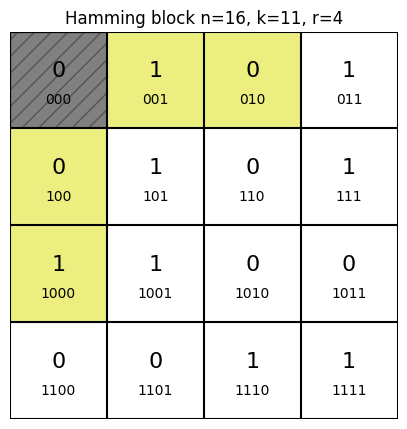

In [33]:
# generiamo una sequenza randomica di k bit
k = 11 # lunghezza del messaggio in bit per ogni blocco
bit_sequence = [random.randint(0, 1) for _ in range(k)]

print("Messaggio originale:", bit_sequence)

block = block_builder(bit_sequence)

print(block)

n_rows = int(len(block) / 4)
n_cols = 4

fig, ax = plt.subplots(figsize=(5, 2.5 * n_cols))
ax.set_xlim(0, n_cols)   # asse x: 4 colonne
ax.set_ylim(0, n_rows)   # asse y: 2 righe

# Disegno della griglia
for x in range(n_cols + 1):
    ax.plot([x, x], # ascissa iniziale e finale
            [0, n_rows], # ordinata iniziale e finale
            color = "black")
for y in range(n_rows + 1):
    ax.plot([0, n_cols], [y, y], color = "black")

# celle quadrate
ax.set_aspect('equal')

# Riempimento celle
for idx, bit in enumerate(block):
    row = n_rows - 1 - idx // n_cols                  # indicizza le righe, "1 -" serve a mettere la prima riga in alto (le coordinate di matplotlib crescono verso l’alto)
    col = idx % n_cols                       # indicizza le colonne
    # siamo nell'area che va da col e col+1 e da row a row+1
    if idx == 0:
        ax.add_patch(
            Rectangle((col, row),               # angolo in basso a sinistra
                      1, 1,                     # larghezza e altezza
                      facecolor = "gray",         # colore di riempimento    
                      edgecolor = "#545454",
                      hatch = '//')                # texture diversa per il bit di parità globale
        )
    elif idx in parity_bits(k):
        ax.add_patch(
            Rectangle((col, row),               # angolo in basso a sinistra
                      1, 1,                     # larghezza e altezza
                      facecolor = "#ecef7f",    # colore di riempimento    
                      edgecolor = 'none')
        )

    binary_index = format(idx, "03b")   # converte idx in binario

    ax.text(col + 0.5, row + 0.6, f"{bit}",
            ha = 'center', va = 'center',   # allineamenti rispetto alla coordinata (x,y)
            fontsize = 16
            )  # scrittura del bit
    ax.text(col + 0.5, row + 0.3, f"{binary_index}",
            ha = 'center', va = 'center', fontsize = 10)  # scrittura dell'indice in binario
    
    ax.set_title(f"Hamming block n={len(block)}, k={k}, r={len(parity_bits(k))}")

ax.axis('off')
plt.show()

Il blocco di Hamming generato è sopra riportato: le caselle gialle sono i bit di parità, le caselle bianche i bit del messaggio e la casella grigia è riservata al bit di parità.

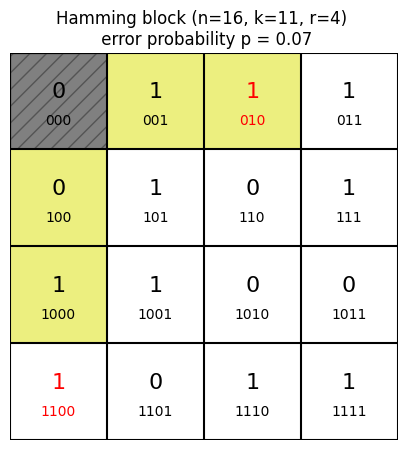

In [34]:
pe = 0.07
block_with_errors = make_errors(block, pe)

n_rows = int(len(block_with_errors) / 4)
n_cols = 4

fig, ax = plt.subplots(figsize=(5, 2.5 * n_rows))
ax.set_xlim(0, n_cols)   # asse x: 4 colonne
ax.set_ylim(0, n_rows)   # asse y: n righe

# Disegno della griglia
for x in range(n_cols + 1):
    ax.plot([x, x], # ascissa iniziale e finale
            [0, n_rows], # ordinata iniziale e finale
            color = "black")
for y in range(n_rows + 1):
    ax.plot([0, n_cols], [y, y], color = "black")

# celle quadrate
ax.set_aspect('equal')

# Riempimento celle
for idx, bit in enumerate(block_with_errors):
    row = (n_rows - 1) - idx // n_cols                  # indicizza le righe, "(n_rows - 1) -" serve a mettere la prima riga in alto (le coordinate di matplotlib crescono verso l'alto)
    col = idx % n_cols                       # indicizza le colonne
    # siamo nell'area che va da col e col+1 e da row a row+1
    if idx == 0:
        ax.add_patch(
            Rectangle((col, row),               # angolo in basso a sinistra
                      1, 1,                     # larghezza e altezza
                      facecolor = "gray",         # colore di riempimento    
                      edgecolor = "#545454",
                      hatch = '//')                # texture diversa per il bit di parità globale
        )
    elif idx in parity_bits(k):
        ax.add_patch(
            Rectangle((col, row),               # angolo in basso a sinistra
                      1, 1,                     # larghezza e altezza
                      facecolor = "#ecef7f",    # colore di riempimento    
                      edgecolor = 'none')
        )

    binary_index = format(idx, "03b")   # converte idx in binario

    # se idx è tra i bit modificati, testo rosso, altrimenti nero
    text_color = "red" if idx in [i for i in range(len(block)) if block[i] != block_with_errors[i]] else "black"

    ax.text(col + 0.5, row + 0.6, f"{bit}",
            ha = 'center', va = 'center',   # allineamenti rispetto alla coordinata (x,y)
            fontsize = 16, color = text_color
            )  # scrittura del bit
    ax.text(col + 0.5, row + 0.3, f"{binary_index}",
            ha = 'center', va = 'center', fontsize = 10, color = text_color
            )  # scrittura dell'indice in binario
    
    ax.set_title(f"Hamming block (n={len(block)}, k={k}, r={len(parity_bits(k))}) \n error probability p = {pe}")

ax.axis('off')
plt.show()

Abbiamo introdotto degli errori (riportati dai bit scritti in rosso) nel blocco inviato con un certa probabilità.

In [28]:
print(hamming(block_with_errors, secded=False))

Codice di Hamming single-error correction (SEC).
Singolo errore rilevato in posizione 8 e corretto.
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1]


Codice di Hamming single-error correction (SEC).
Singolo errore rilevato in posizione 14 e corretto.
Codice di Hamming single-error correction double-error detection (SECDED).
Errore multiplo rilevato.
SECDED: errore doppio rilevato, visualizzazione con blocco originale


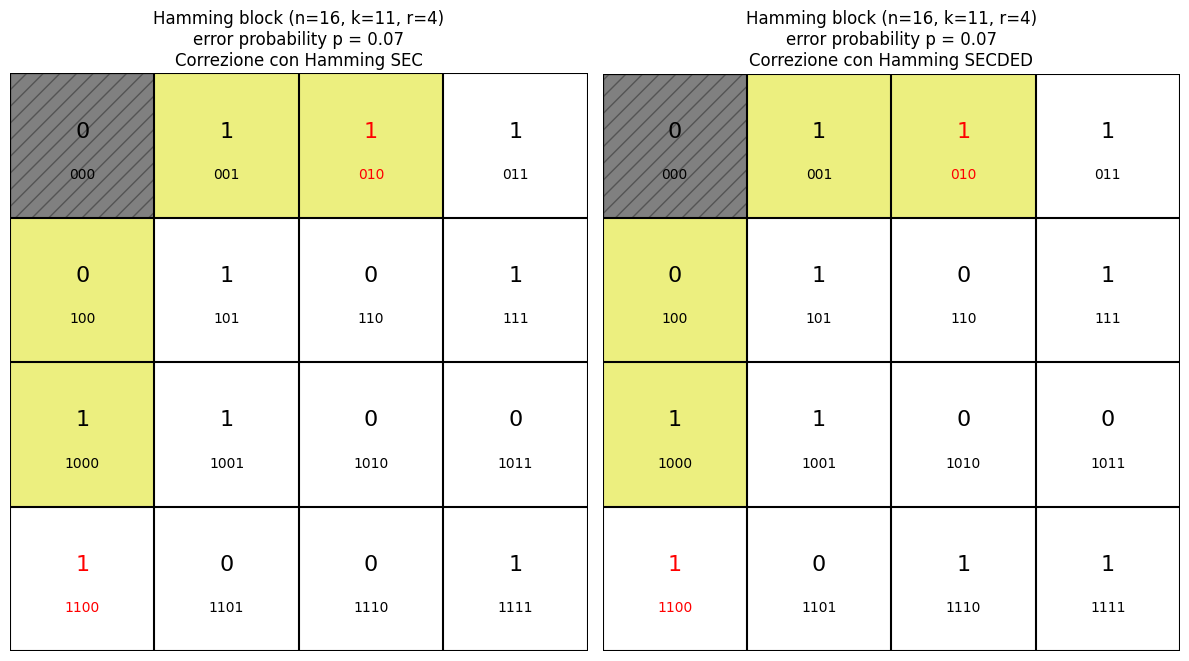

In [37]:
# ================= VISUALIZZAZIONE AFFIANCATA DOPO CORREZIONE =================

corrected_block_sec = hamming(block_with_errors, secded=False)
corrected_block_secded = hamming(block_with_errors, secded=True)

# Gestione errore doppio SECDED
if not isinstance(corrected_block_secded, list):
    print("SECDED: errore doppio rilevato, visualizzazione con blocco originale")
    corrected_block_secded = block_with_errors.copy()

blocks = [
    ("Correzione con Hamming SEC", corrected_block_sec),
    ("Correzione con Hamming SECDED", corrected_block_secded)
]

n_cols = 4
n_rows = len(block_with_errors) // n_cols

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 2.5 * n_rows))

for ax, (title_label, block_corrected) in zip((ax1, ax2), blocks):

    ax.set_xlim(0, n_cols)
    ax.set_ylim(0, n_rows)

    # Griglia
    for x in range(n_cols + 1):
        ax.plot([x, x], [0, n_rows], color="black")
    for y in range(n_rows + 1):
        ax.plot([0, n_cols], [y, y], color="black")

    ax.set_aspect('equal')

    # Celle e testi
    for idx, bit in enumerate(block_corrected):
        row = (n_rows - 1) - idx // n_cols
        col = idx % n_cols

        # Celle di sfondo
        if idx == 0:
            ax.add_patch(Rectangle((col, row), 1, 1,
                                   facecolor="gray",
                                   edgecolor="#545454",
                                   hatch='//'))
        elif idx in parity_bits(k):
            ax.add_patch(Rectangle((col, row), 1, 1,
                                   facecolor="#ecef7f",
                                   edgecolor='none'))
        else:
            ax.add_patch(Rectangle((col, row), 1, 1,
                                   facecolor="white",
                                   edgecolor='none'))

        # Colore del bit
        if block_with_errors[idx] != block[idx] and block_corrected[idx] != block[idx]:
            text_color = "red"      # errore NON corretto
        elif block_with_errors[idx] != block[idx] and block_corrected[idx] == block[idx]:
            text_color = "green"    # errore corretto
        else:
            text_color = "black"    # bit già corretto

        binary_index = format(idx, "03b")

        ax.text(col + 0.5, row + 0.6, f"{bit}",
                ha='center', va='center',
                fontsize=16, color=text_color)

        ax.text(col + 0.5, row + 0.3, binary_index,
                ha='center', va='center',
                fontsize=10, color=text_color)

    # Titolo multi-riga
    ax.set_title(
        f"Hamming block (n={len(block)}, k={k}, r={len(parity_bits(k))})\n"
        f"error probability p = {pe}\n"
        f"{title_label}"
    )

    ax.axis('off')

plt.tight_layout()
plt.show()


Applichiamo la decodifica di Hamming ad una situazione più concreta: due comunicatori che si scambiano una generica sequenza alfanumerica.

In [ ]:
# ===== LETTURA DEL FILE E CONVERSIONE IN BINARIO =====
# In questa sezione leggiamo il contenuto del file di testo e lo convertiamo in una
# rappresentazione binaria. Questo passaggio è fondamentale per poter applicare l'algoritmo
# di Hamming al messaggio originale.
#
# Il processo avviene in due fasi:
# 1. Lettura del file: Utilizziamo un context manager (with) per aprire e leggere il file
#    in modo sicuro, garantendo che il file venga chiuso automaticamente al termine
# 2. Conversione in binario: Trasformiamo ogni carattere della stringa nel suo codice ASCII
#    a 8 bit, creando una sequenza binaria che rappresenta il messaggio
#
# Questa sequenza binaria verrà successivamente:
# - Divisa in blocchi di k bit
# - Codificata con i bit di parità del codice di Hamming
# - Trasmessa attraverso un canale rumoroso (con introduzione di errori casuali)
# - Decodificata e corretta dal ricevitore mediante l'algoritmo di Hamming

# 'with' è un "gestore di contesto": garantisce che il file venga chiuso automaticamente non appena finiamo di leggere, evitando sprechi di memoria o errori di sistema
# questo comando apre il file "Alice.txt" in modalità lettura
with open("Alice.txt", "r") as file:
    # legge tutto il contenuto del file e rimuove eventuali spazi bianchi iniziali/finali
    input_str = file.read().strip() # stringa di input

print(input_str)

Il costo in tempo della funzione è lineare nel numero di bit di messaggio


In [67]:
# converte una stringa in una rappresentazione binaria, dove ogni carattere è rappresentato da 8 bit come lista di numeri
def string_to_binary(s):
    # per ogni carattere 'c' nella stringa, ottiene il codice ASCII con ord(c),
    # format(..., '08b') lo converte in binario con 8 bit con padding di zeri a sinistra, e crea una lista di interi
    # il ciclo più esterno (il primo) itera sui caratteri della stringa
    # il ciclo interno (il secondo) itera sui bit della stringa binaria di quel carattere e li converte in interi
    return [int(b) for c in s for b in format(ord(c), '08b')]

# lista che contiene il messaggio in rappresentazione binaria
input_bin = string_to_binary(input_str)

print(input_bin)

[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 

In [68]:
r = len(parity_bits(k))  # numero dei bit di parità
n = 1 + k + r  # lunghezza del blocco (incluso il bit di parità globale)

# lista che conterrà i blocchi di dati da inviare (bit di messaggio + bit di parità)
sent_data = []

# dividi la lista "input_bin" in sottoliste di k bit ciascuna
input_bin_div = [input_bin[i:i+k] for i in range(0, len(input_bin), k)]

# ciclo sulle divisioni del messaggio originario
for i in range(0, len(input_bin_div)):
    message = input_bin_div[i]  # estraiamo il blocco di k bit dal messaggio originale
    sent_data.append(block_builder(message))

print(input_bin_div)
print(sent_data)

[[0, 1, 0, 0], [1, 0, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 1], [0, 1, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [1, 1, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0, 0, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 1, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 1, 0], [0, 1, 1, 1], [1, 0, 1, 0], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [1, 1, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [1, 1

In [69]:
# introduciamo degli errori casuali
p = 0.05  # probabilità di errore (bit flip)
# send = 1
sent_data_with_errors = []
for i in range(len(sent_data)):
    sent_data_with_errors.append(make_errors(sent_data[i], p))

print(sent_data)
print(sent_data_with_errors)

[[1, 1, 0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [0, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 0, 0, 0, 0, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0

In [70]:
output_bin_with_errors = []

for i in range(len(sent_data_with_errors)):
    message = [sent_data_with_errors[i][j] for j in message_bits(k)]
    output_bin_with_errors.extend(message)

# converte una lista di bit (numeri 0 o 1) in una stringa alfanumerica
def binary_to_string(binary_list):
    # lista per raccogliere i caratteri convertiti
    result = []
    # itera sulla lista binaria a passi di 8 bit
    for i in range(0, len(binary_list), 8):
        # estrae un blocco di 8 bit
        byte = binary_list[i:i+8]
        # se il blocco ha esattamente 8 bit, lo converte
        if len(byte) == 8:
            # converte la lista in stringa binaria, poi in intero, poi in carattere ASCII
            byte_str = ''.join(str(b) for b in byte)
            char = chr(int(byte_str, 2))
            result.append(char)
    # unisce tutti i caratteri in una stringa
    return ''.join(result)

# output_str = binary_to_string(output_bin)
print(output_bin_with_errors)
output_str = binary_to_string(output_bin_with_errors)
print(output_str)

[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 

In [71]:
print(sent_data)
print(sent_data_with_errors)

sent_data_corrected = []
for i in range(len(sent_data_with_errors)):
    send = 2
    while send == 2:
        send = hamming(sent_data_with_errors[i], True)
    sent_data_corrected.append(send)

print(sent_data_corrected)

[[1, 1, 0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [0, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 0, 0, 0, 0, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0

In [72]:
output_bin_corrected = []

for i in range(len(sent_data_corrected)):
    message = [sent_data_corrected[i][j] for j in message_bits(k)]
    output_bin_corrected.extend(message)

output_str = binary_to_string(output_bin_corrected)
print(output_str)

Il costo in tempo della funzioke è lineAre nal numero di bit di messagcio
